In [22]:
# to generate plots that shows fitting with ANN
# is clearly a function of the quantity of training data
# and the number of epochs

# data for fitting by the ANN is generated using a configurable multivariate
# linear model

# the code can also be changed easily to look at two alternative model
# architectures, and of course, the number of neurons in the dense layer can
# be modulated

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from math import ceil, floor
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Number of samples
num_samples = 1000

# Generate predictable random values for features
np.random.seed(0)
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Calculate y using the multivariate linear model
# some constants for data generation
c0 = 1
c1 = 1.2
c2 = 2.4
c3 = 3.9
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

if (False):
  # the equation the get the label aka y
  label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * feature3)
  # a text label from data generation
  model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " X3".translate(SUB)
else:
  # non-linear regression example
  label = c0 + (c1 * feature1) + (c2 * (feature2 ** 2))  + (c3 * (feature3 ** 3))
  model_as_text = "y = " + str(c0) + " + " + str(c1) + " x1 + ".translate(SUB) + str(c2) + " x2".translate(SUB) + "2".translate(SUP) + " +" + str(c3) + " x3".translate(SUB) + "3".translate(SUP)

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'label': label
})
#print(data)

# Column to sort by, the label index
column_index = 3
print("\nSorted\n")
# Sort the array based on the specified column
data = data.sort_values(by='label')
# have a look at the generated data
print(data)


Sorted

     feature1  feature2  feature3     label
198  0.058029  0.019462  0.028257  1.070632
530  0.024313  0.105095  0.191202  1.082945
417  0.012036  0.132306  0.192881  1.084440
14   0.071036  0.020950  0.025232  1.086359
990  0.012171  0.173193  0.082494  1.088785
..        ...       ...       ...       ...
104  0.248753  0.985109  0.974723  7.239232
812  0.288570  0.955962  0.986992  7.289338
892  0.448369  0.957489  0.970213  7.300095
178  0.704414  0.944626  0.973642  7.586523
366  0.724168  0.956871  0.996100  7.920997

[1000 rows x 4 columns]


In [24]:
# pull the data frame apart
X = data[['feature1', 'feature2', 'feature3']].values
y = data['label'].values

# print some data points from X and y
# remember syntax of slicing is different to perl
print_n = 5
print("Showing " + str(print_n) + " data points")
print("X:\n")
print(X[:print_n])
print("")
print("X.shape[1] = " + str(X.shape[1]))
print("")
print("y:\n")
print(y[:print_n])

Showing 5 data points
X:

[[0.05802916 0.01946247 0.02825668]
 [0.0243132  0.10509469 0.1912022 ]
 [0.01203622 0.13230567 0.1928807 ]
 [0.07103606 0.02095007 0.02523183]
 [0.01217116 0.17319324 0.0824935 ]]

X.shape[1] = 3

y:

[1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]


Set epochs_tup to  (1, 3, 5, 25, 50, 100, 200, 400, 1200)
epochs 1

Training loss begin: 3.2863640785217285
Training loss   end: 3.2863640785217285

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [0.08501429 0.14402092 0.15216371 0.08448251 0.14391777]
-----------------------------------------------------------
epochs 3



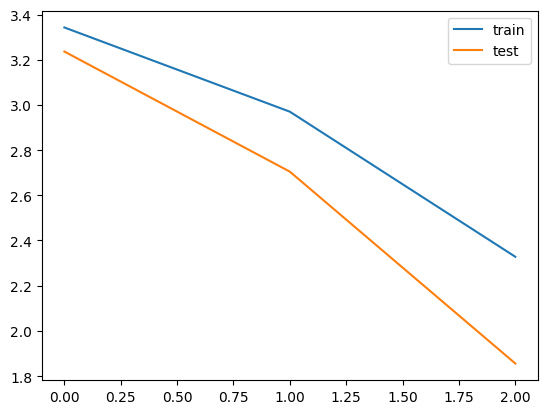

Training loss begin: 3.3427374362945557
Training loss   end: 2.3280293941497803

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [0.6681731  0.7573988  0.76678073 0.67916167 0.7485415 ]
-----------------------------------------------------------
epochs 5



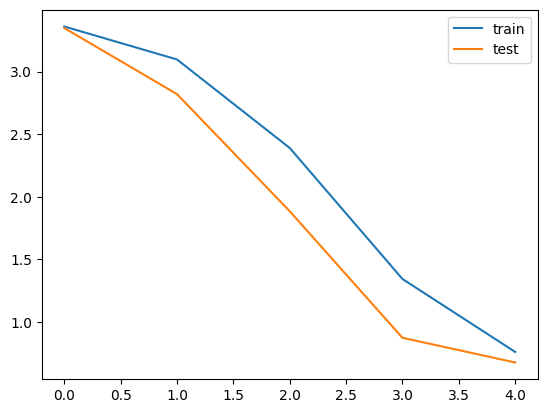

Training loss begin: 3.3613390922546387
Training loss   end: 0.7587950229644775

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [1.3927611 1.6703948 1.6919874 1.4081242 1.5980226]
-----------------------------------------------------------
epochs 25



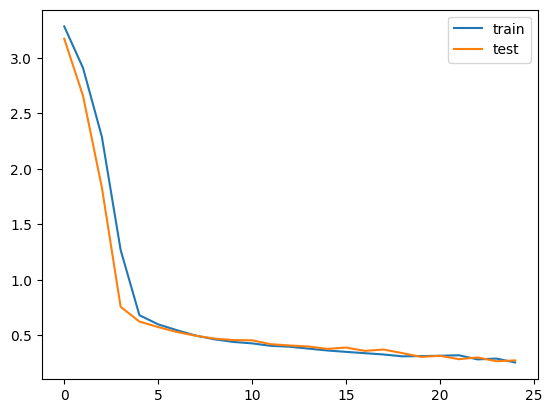

Training loss begin: 3.284318447113037
Training loss   end: 0.2544792890548706

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [0.31296661 0.6831375  0.7283575  0.32864806 0.6431571 ]
-----------------------------------------------------------
epochs 50



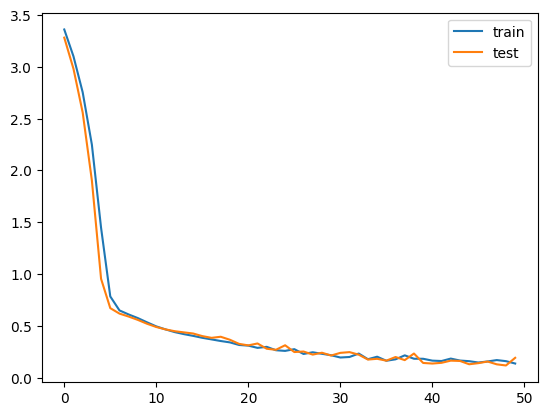

Training loss begin: 3.3607490062713623
Training loss   end: 0.13624343276023865

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [0.56337297 0.7459968  0.7810295  0.5826373  0.79916936]
-----------------------------------------------------------
epochs 100



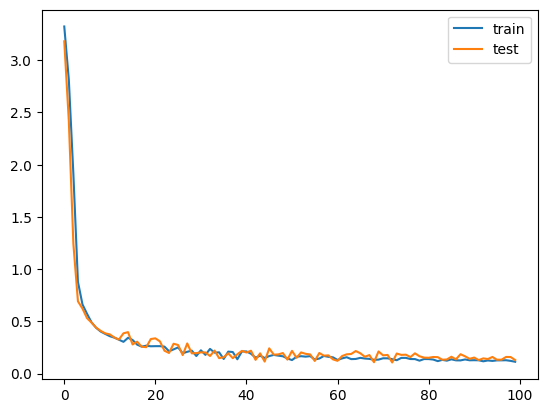

Training loss begin: 3.323030948638916
Training loss   end: 0.1136460080742836

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [1.0395479 1.0865374 1.1024947 1.059458  1.1369346]
-----------------------------------------------------------
epochs 200



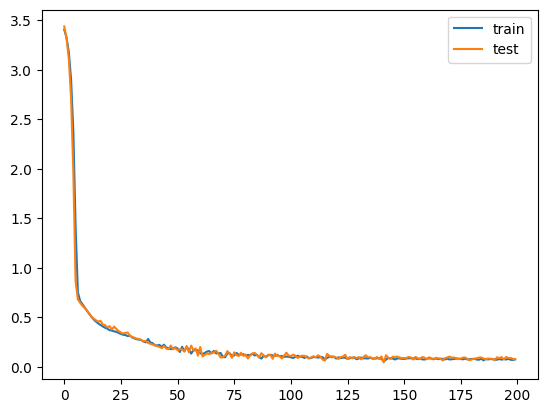

Training loss begin: 3.405789852142334
Training loss   end: 0.07642048597335815

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [1.0188566 1.1042889 1.1156435 1.0359977 1.1201351]
-----------------------------------------------------------
epochs 400



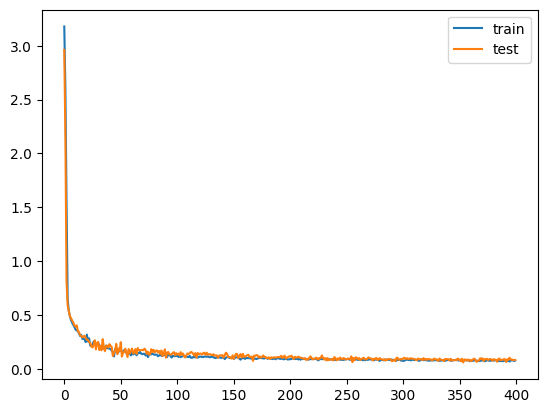

Training loss begin: 3.1787688732147217
Training loss   end: 0.07852844893932343

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [1.10559   1.0991114 1.1040921 1.1187583 1.0933765]
-----------------------------------------------------------
epochs 1200



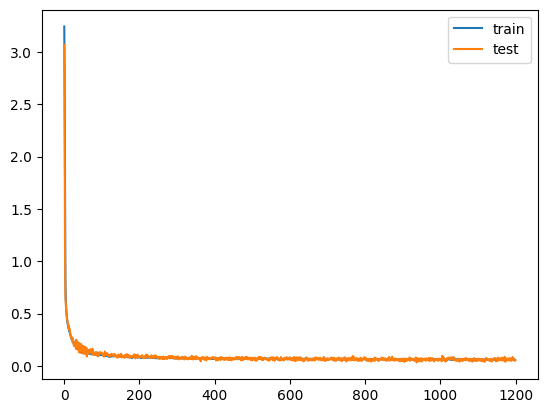

Training loss begin: 3.244293212890625
Training loss   end: 0.05747130885720253

Showing  5  sample values..

          y:  [1.07063207 1.08294468 1.08444033 1.08635929 1.08878493]
predictions:  [1.0982666 1.111344  1.1161714 1.1120062 1.117378 ]
-----------------------------------------------------------


In [25]:
# Create a list to store the plot data (axes)
series = []
titles = []

# Define the number of plots in the grid
# Number of rows and columns for the grid
epochs_tup = ()
if (False):
  epochs_tup = (1, 5, 50, 100)
  n_rows = 2
  n_cols = 2
elif (False):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 800)
  n_rows = 3
  n_cols = 3
elif (True):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 1200)
  n_rows = 3
  n_cols = 3
else:
  epochs_tup = (1, 25, 50, 100, 200, 800)
  n_rows = 2
  n_cols = 3

print("Set epochs_tup to ", epochs_tup)

num_plots = n_cols * n_rows

#print("type ", type(epochs_tup))
#print("length ", len(epochs_tup))

for epochs in (epochs_tup):

  print("epochs " + str(epochs))
  print("")
  #model_type = "2 Layer ANN"
  # model_type = "3 Layer ANN"
  # model_type = "4 Layer ANN"
  model_type = "5 Layer ANN"

  if (model_type == "2 Layer ANN"):
    model_desc = "2 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    # Create and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X.shape[1],))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
  elif (model_type == "3 Layer ANN"):
    model_desc = "3 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mae', optimizer='adam')
  elif (model_type == "5 Layer ANN"):
    # incomplete, attempt at non-linear regression
    model_desc = "5 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation="relu", input_dim=X.shape[1]))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(8, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    #model.compile(loss='mae', optimizer='adam')
    # Create the Adam optimizer with custom parameters
    adam_optimizer = tf.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.001 /200,
      amsgrad=False
    )

    model.compile(loss='mae', optimizer=adam_optimizer)

  # Patient early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400)


  # Split data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs,
                      validation_data=(X_val, y_val), verbose=0, batch_size=100, callbacks=[es])

  # Plot training history
  if (epochs > 1):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

  print("Training loss begin:", history.history['loss'][0])
  print("Training loss   end:", history.history['loss'][-1])
  print("")

  # Make predictions
  pred = model.predict(X, verbose = 0)

  # lets see some actual values and predictions
  # y is also (data['label'].values)
  p_n = 5
  print("Showing ", str(p_n), " sample values..\n")
  print("          y: ", y[:p_n])
  predictions = pred[:,0]
  print("predictions: ", predictions[:p_n])

  # get min and max of y and predictions for scale limits
  max_value = ceil(max(max(y),max(predictions)))
  min_value = floor(min(min(y),min(predictions)))
  ilist = list(range(min_value, max_value + 1))

  # Define the series to be added to each plot
  one_plot_data = [(y, predictions, 'Data points'), (ilist, ilist, 'Identity')]
  series.append(one_plot_data)
  titles.append(model_desc)

  print("-----------------------------------------------------------")

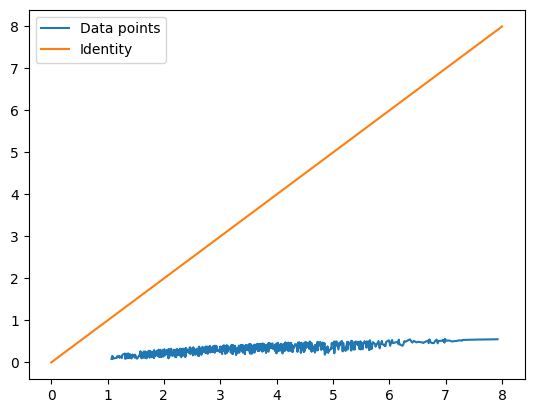

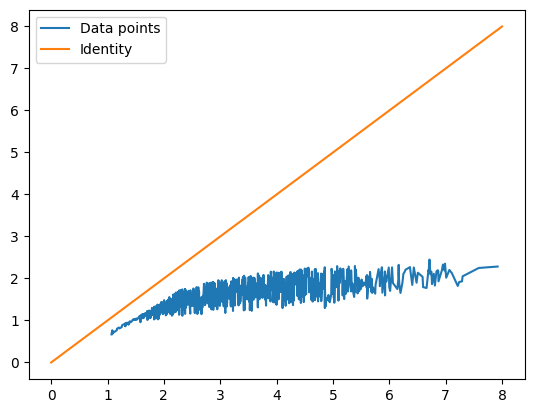

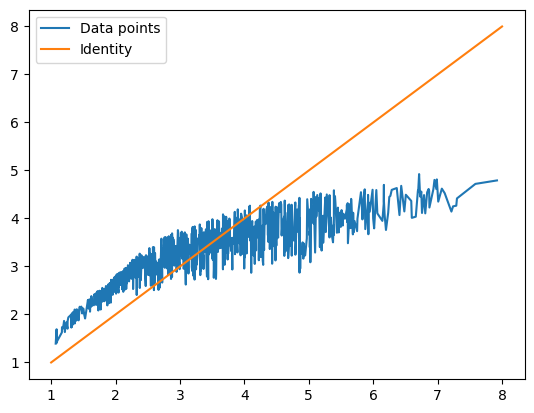

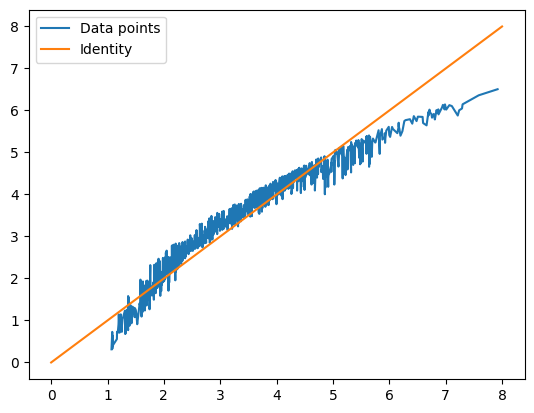

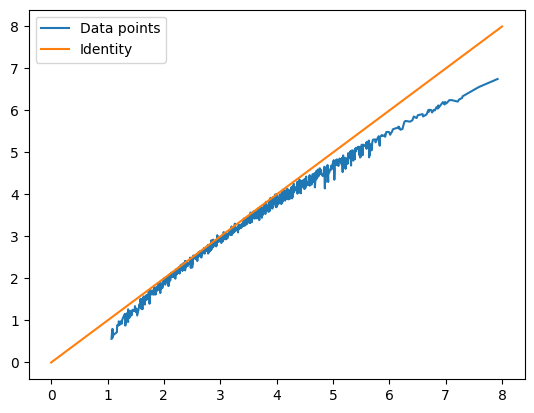

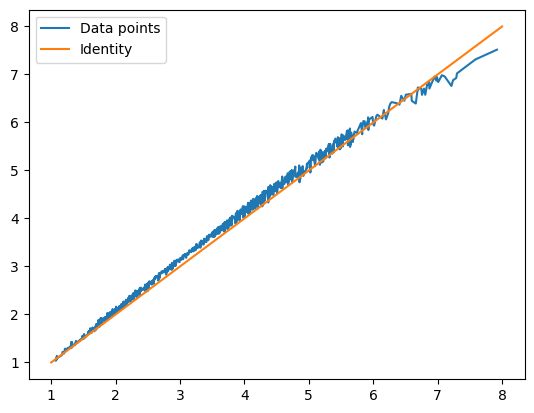

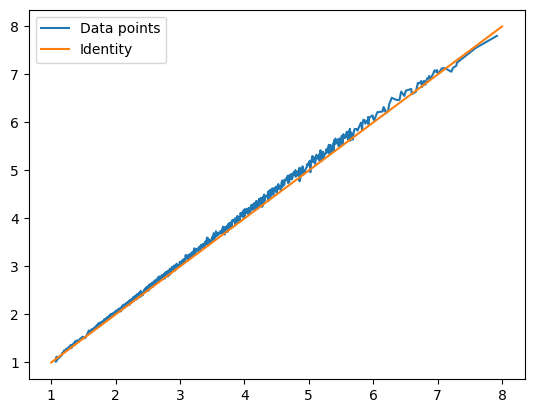

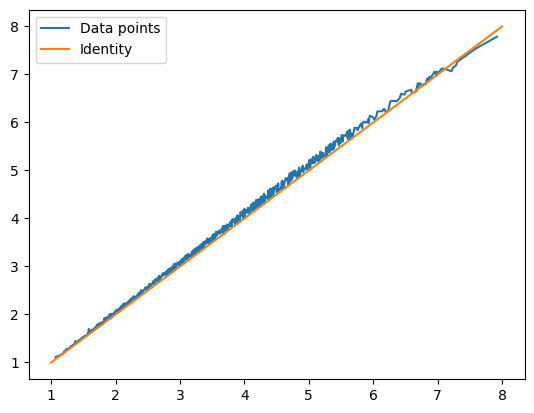

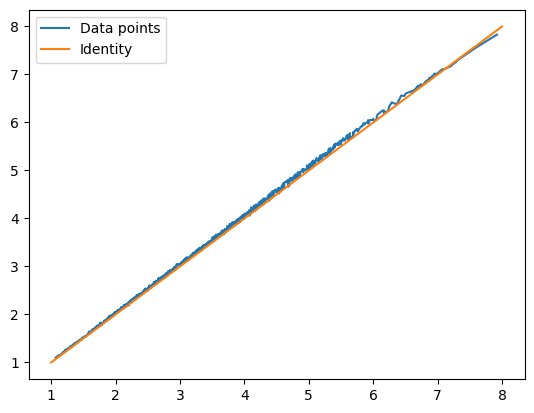

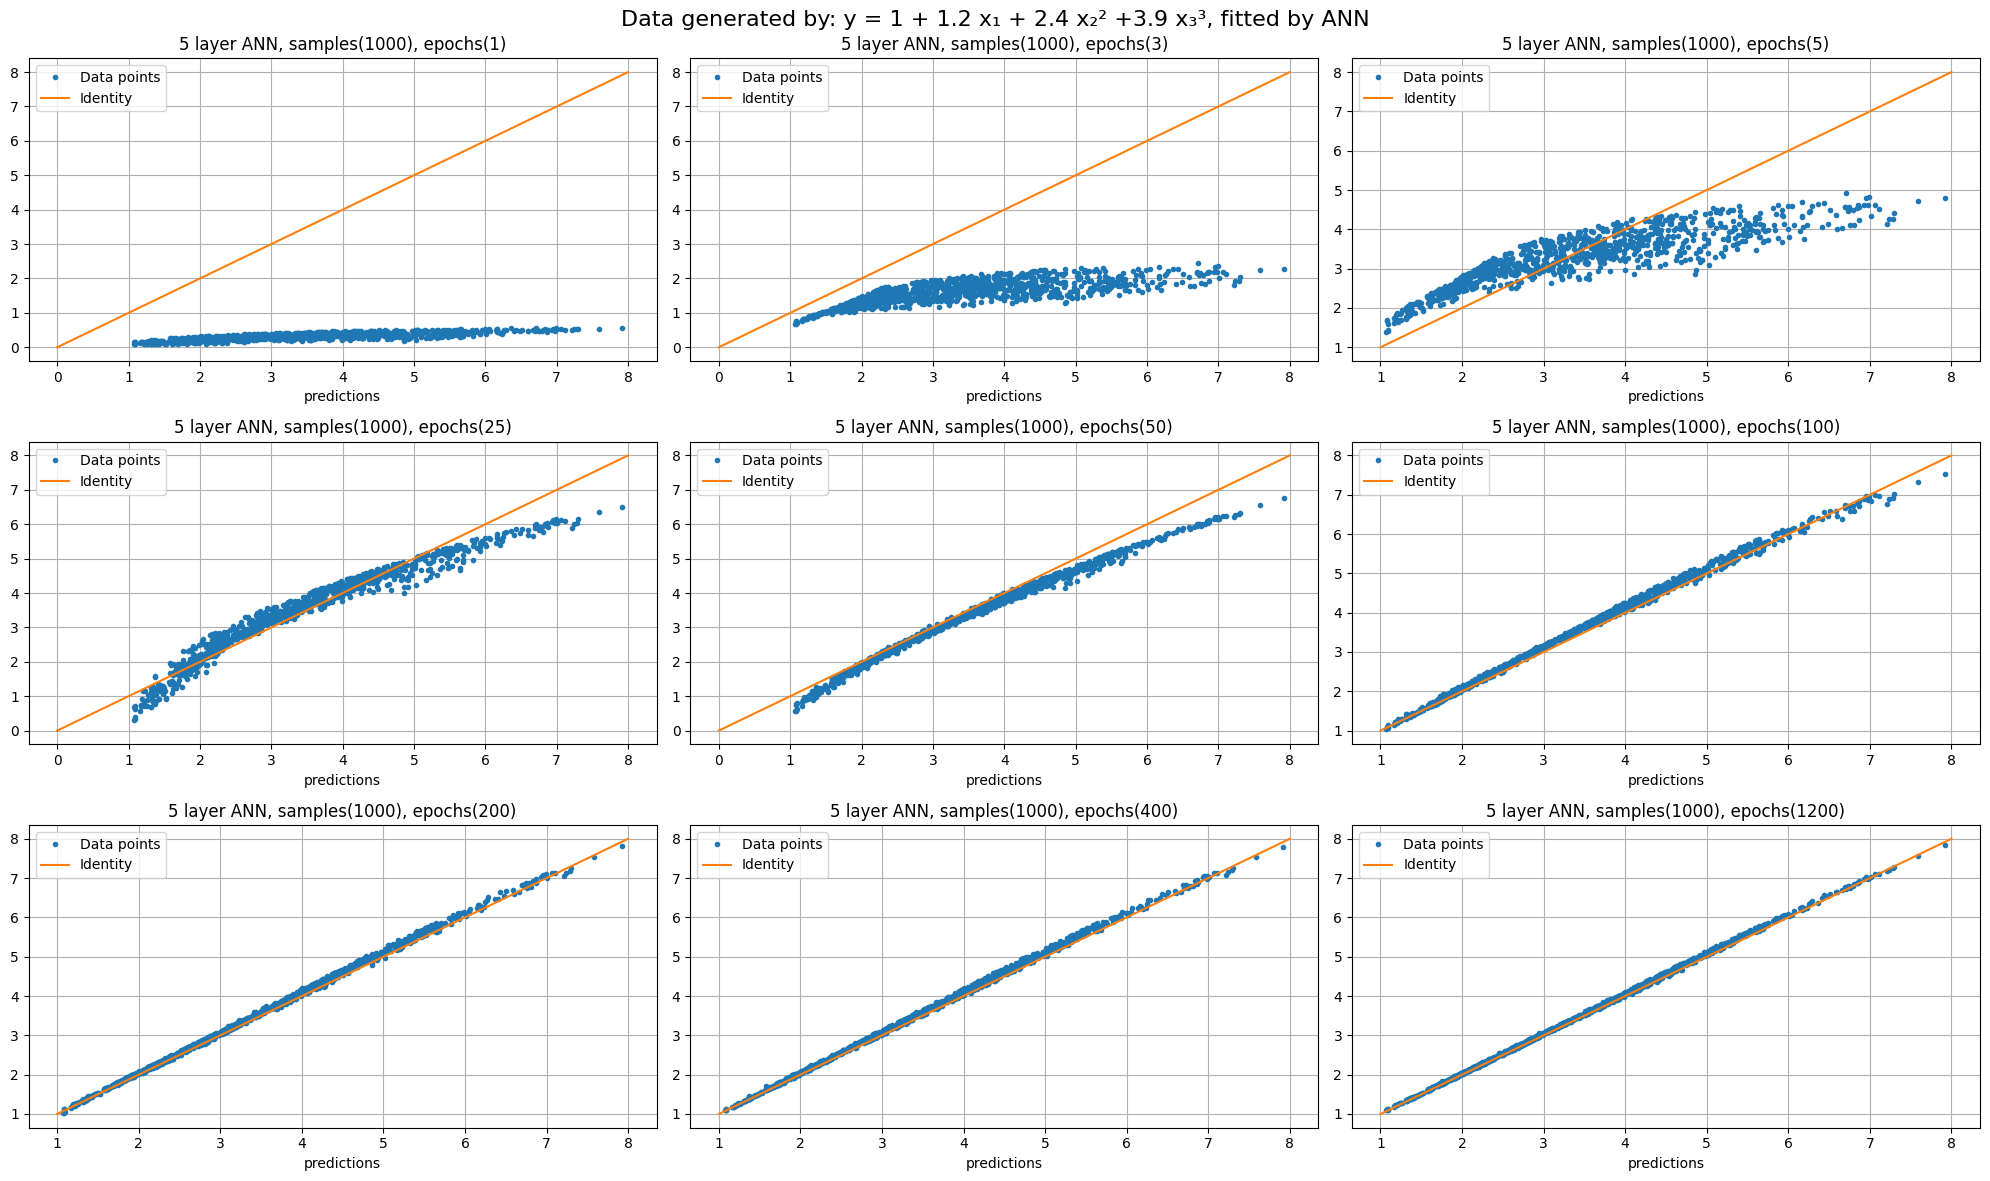

In [26]:
# Create a list to store the plot data (figure and axes)
plot_data = []

# Create plots in a loop
for series_set in series:
    fig, ax = plt.subplots()
    for x_data, y_data, label in series_set:
        ax.plot(x_data, y_data, label=label)
    ax.legend()
    plot_data.append((fig, ax))


# Create a new figure for the grid layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))

fig.suptitle('Data generated by: ' + model_as_text + ', fitted by ANN', fontsize=16)

# Flatten the axs array if necessary (in case of a single row or column)
if n_rows == 1 and n_cols == 1:
    axs = np.array([[axs]])

axs = axs.flatten()

# Loop over the plot_data array and plot in the grid
for i, (fig, ax) in enumerate(plot_data):
    for line in ax.get_lines():
        if (line.get_label() == 'Identity'):
          style = '-'
        else:
          style = '.'
        axs[i].plot(line.get_xdata(), line.get_ydata(), style, label=line.get_label())
    axs[i].legend()
    axs[i].set_xlabel('y')
    axs[i].set_xlabel('predictions')
    axs[i].set_title(titles[i])
    axs[i].grid(True)


# Adjust layout
plt.tight_layout()

# Display the grid of plots
#plt.show()
fig.show()

In [27]:
# Extract and print model weights
print("here are the weights: \n")
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    for i, weight in enumerate(weights):
        print(f"Weight {i + 1}:")
        print(weight)

here are the weights: 

Layer: dense_140
Weight 1:
[[-0.00686116  0.01517705  0.1252812   0.17176555 -0.186337    0.0106657
   0.02097052 -0.10631425  0.02321249  0.13374603 -0.06537595  0.12306716
   0.01853311 -0.01925682  0.03301883  0.08810157  0.03806725 -0.00285535
  -0.03405262  0.05415782 -0.1511222  -0.0705947  -0.17724332  0.17395942
  -0.01468385 -0.09673366 -0.19170472  0.0865834   0.07073786 -0.07582285
  -0.03479195  0.015505   -0.20980328  0.01491488  0.04283225  0.04074775
   0.03028813 -0.00580593 -0.01630635  0.0611303  -0.02987952  0.01999468
   0.01844067 -0.12845054 -0.01945385  0.133624    0.12647788  0.2201834
  -0.02548033 -0.02301137  0.07380239 -0.07091735  0.15854104  0.11039559
  -0.03145498 -0.07635377  0.04016155 -0.00805082  0.20401807 -0.00662769
   0.01708312  0.00931343  0.0304442   0.0423856  -0.00906405 -0.02350659
  -0.06657083 -0.00080616  0.1982295  -0.17113525  0.00602514 -0.02343575
  -0.07013696  0.00348983  0.25358698 -0.03282044  0.19971602 -

The model architecture


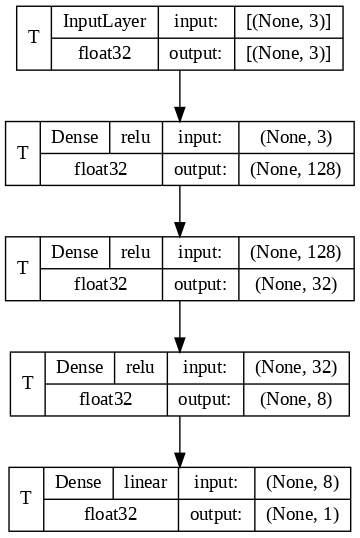

In [28]:
# Generate a plot of the model architecture
print("The model architecture")
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           show_dtype=True,
           expand_nested=True,
           dpi=100,
           show_layer_activations=True,
           show_trainable=True)
